In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# !pip install matplotlib

In [3]:
x = np.arange(11)
y = x**2
print(x, y)

[ 0  1  2  3  4  5  6  7  8  9 10] [  0   1   4   9  16  25  36  49  64  81 100]


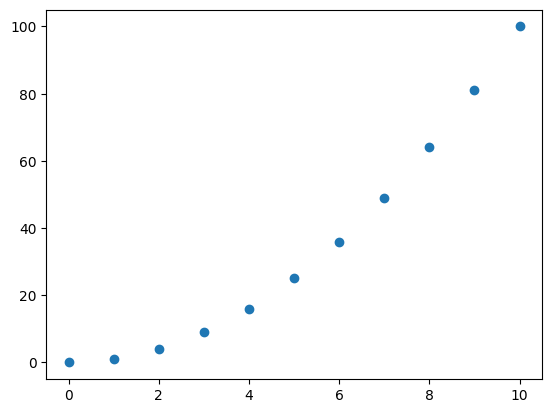

In [4]:
plt.scatter(x, y)

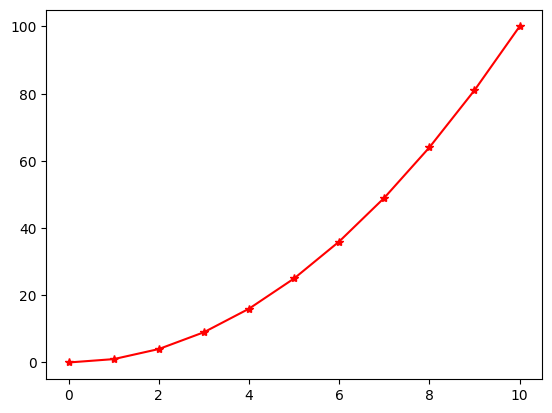

In [5]:
plt.plot(x,y, 'r-*')

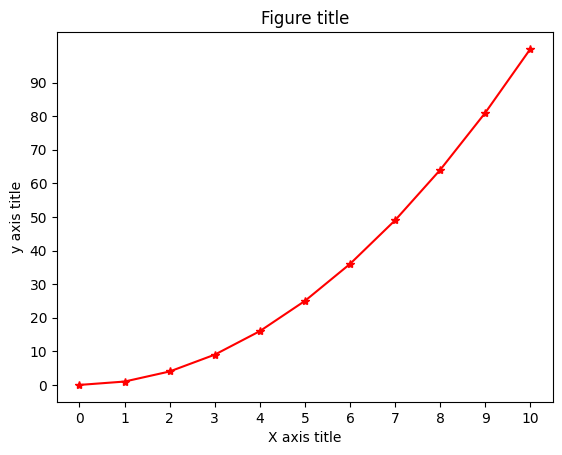

In [6]:
plt.plot(x,y, 'r-*')

plt.xlabel('X axis title')
plt.ylabel('y axis title')
plt.title("Figure title")
plt.xticks(range(0, 11))
plt.yticks(range(0, 100, 10))
plt.show()

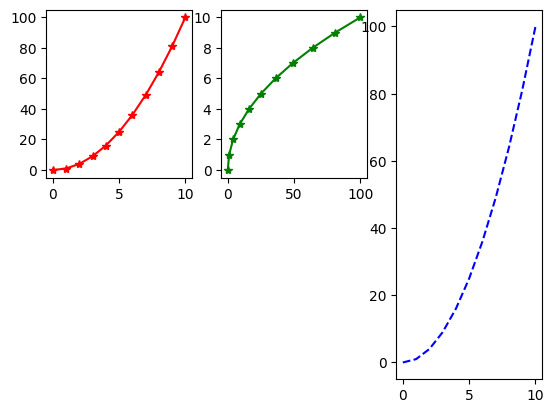

In [7]:
plt.subplot(2, 3, 1)
plt.plot(x, y, 'r-*')


plt.subplot(2, 3, 2)
plt.plot(y, x, 'g-*')


plt.subplot(1, 3, 3)
plt.plot(x, y, 'b--')




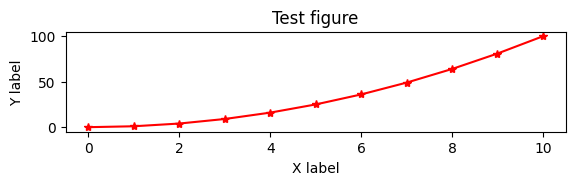

In [8]:
fig = plt.figure(figsize=(10,5))

#[left, bottom, width, height]
axes = fig.add_axes([0.3, 0.5, 0.5, 0.2])

axes.plot(x, y, 'r-*')
axes.set_xlabel("X label")
axes.set_ylabel("Y label")
axes.set_title("Test figure")

fig.savefig("graph.pdf", dpi=200)

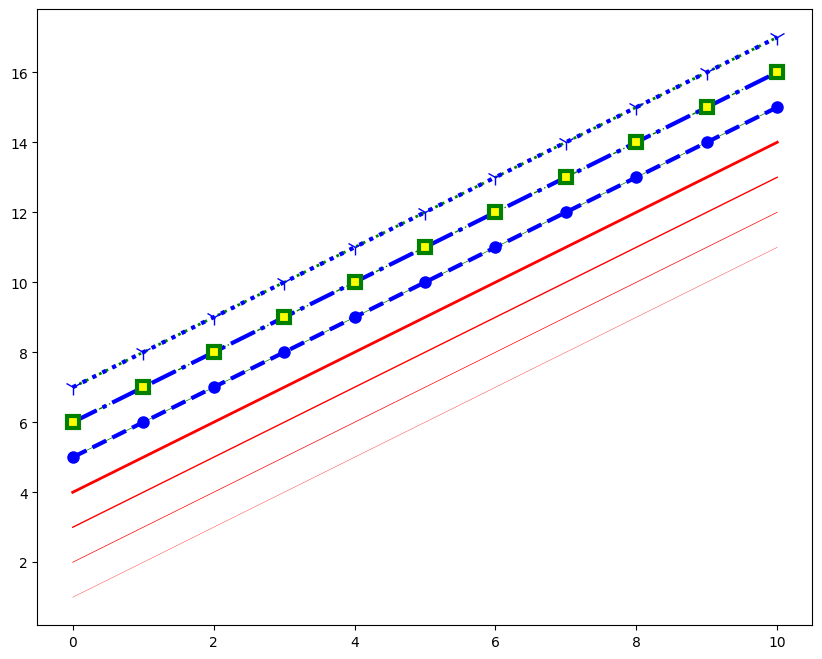

In [9]:
fig, axes = plt.subplots(figsize=(10,8))

axes.plot(x, x+1, color="red", linewidth=0.25 )
axes.plot(x, x+2, color="red", linewidth=0.50 )
axes.plot(x, x+3, color="red", linewidth=1.00 )
axes.plot(x, x+4, color="red", linewidth=2.00 )

axes.plot(x, x+5, color="green", lw=0.50, linestyle = '-' )
axes.plot(x, x+6, color="green", lw=1.00, ls='-.' )
axes.plot(x, x+7, color="green", lw=2.00, ls=':' )

axes.plot(x, x+5, color="blue", lw=3, linestyle = '--', marker='o', markersize=8 )
axes.plot(x, x+6, color="blue", lw=3, ls='-.', marker='s', markersize=8, markerfacecolor="yellow", 
         markeredgecolor="green", markeredgewidth=3)
axes.plot(x, x+7, color="blue", lw=3, ls=':', marker='1', markersize=12 )


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ------------------------
# 📊 Step 1: Mock Data Creation
# ------------------------

np.random.seed(42)  # reproducibility

districts = ['Downtown', 'East Side', 'West End', 'Northville', 'Southtown']
complaint_types = ['Power Cut', 'Trafic', 'Traffick', 'Noise', 'Garbage', 'Water Leak', 'Power Cut', 'Ice Cream Cart']
ice_cream_flavors = ['Vanilla', 'Chocolate', 'Strawberry', 'Mint', 'Mango', 'Lemon', 'Pistachio', 'Cookie Dough', 'Coffee', 'Blueberry']

n_rows = 500

data = {
    'district': np.random.choice(districts, size=n_rows),
    'complaint_type': np.random.choice(complaint_types, size=n_rows),
    'temperature': np.random.normal(loc=32, scale=5, size=n_rows),
    'electricity_usage': np.random.normal(loc=250, scale=50, size=n_rows),
    'num_ice_cream_carts': np.random.choice([0, 1, 2, 5, 10, 10, 10], size=n_rows),
    'survey_rating': np.random.choice([1, 2, 3, 4, 5, np.nan], size=n_rows),
}

df = pd.DataFrame(data)

In [11]:
df.head()

,district,complaint_type,temperature,electricity_usage,num_ice_cream_carts,survey_rating
0,Northville,Water Leak,39.615620,199.919000,1,1.0
1,Southtown,Noise,34.694550,235.944985,10,3.0
2,West End,Ice Cream Cart,26.813769,339.884326,5,4.0
3,Southtown,Power Cut,31.048307,282.042143,5,1.0
4,Southtown,Water Leak,27.621909,221.441051,10,4.0


In [12]:
df.loc[5:10, 'complaint_type']= np.nan
df = pd.concat([df, df.iloc[0:5]])

In [13]:
df.head()

,district,complaint_type,temperature,electricity_usage,num_ice_cream_carts,survey_rating
0,Northville,Water Leak,39.615620,199.919000,1,1.0
1,Southtown,Noise,34.694550,235.944985,10,3.0
2,West End,Ice Cream Cart,26.813769,339.884326,5,4.0
3,Southtown,Power Cut,31.048307,282.042143,5,1.0
4,Southtown,Water Leak,27.621909,221.441051,10,4.0


In [14]:
df.shape

(505, 6)

In [15]:
print(df.isnull().sum())

district                0
complaint_type          6
temperature             0
electricity_usage       0
num_ice_cream_carts     0
survey_rating          78
dtype: int64


In [16]:
print(df.duplicated().sum())

5


In [17]:
print(df.dtypes)

district                object
complaint_type          object
temperature            float64
electricity_usage      float64
num_ice_cream_carts      int64
survey_rating          float64
dtype: object


In [18]:
print(df['district'].value_counts())

district
Northville    113
Downtown      109
Southtown      96
East Side      95
West End       92
Name: count, dtype: int64


In [19]:
complaints_per_distrit = df. groupby('district')['complaint_type'].count()
print(complaints_per_distrit)

district
Downtown      109
East Side      94
Northville    112
Southtown      95
West End       89
Name: complaint_type, dtype: int64


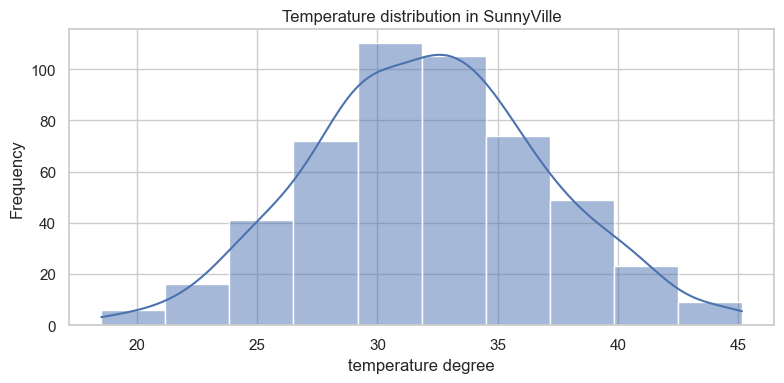

In [20]:
sns.set(style="whitegrid")

plt.figure(figsize=(8,4))
sns.histplot(df['temperature'], kde=True, bins=10)
plt.title("Temperature distribution in SunnyVille")
plt.xlabel("temperature degree")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

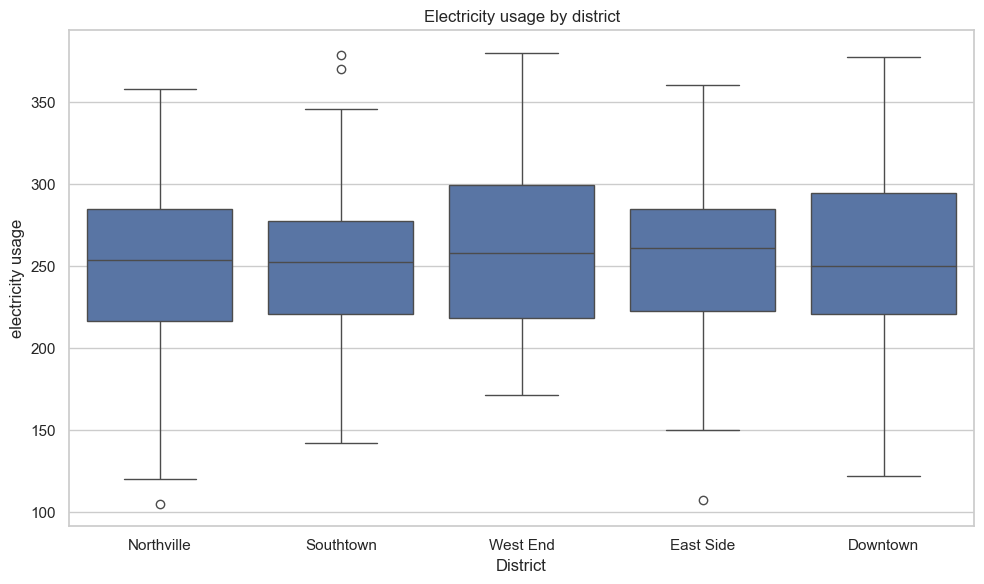

In [21]:
plt.figure(figsize=(10,6))

sns.boxplot(x='district', y='electricity_usage', data=df)
plt.title("Electricity usage by district")
plt.xlabel("District")
plt.ylabel("electricity usage")
plt.tight_layout()
plt.show()

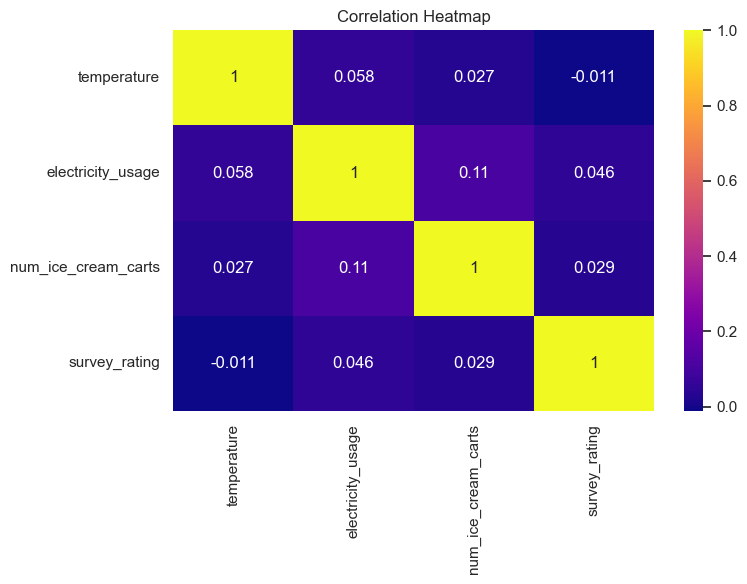

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="plasma")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

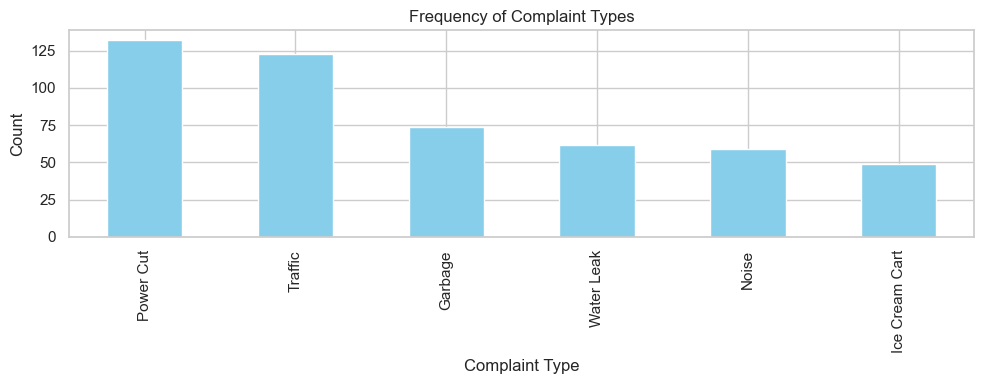

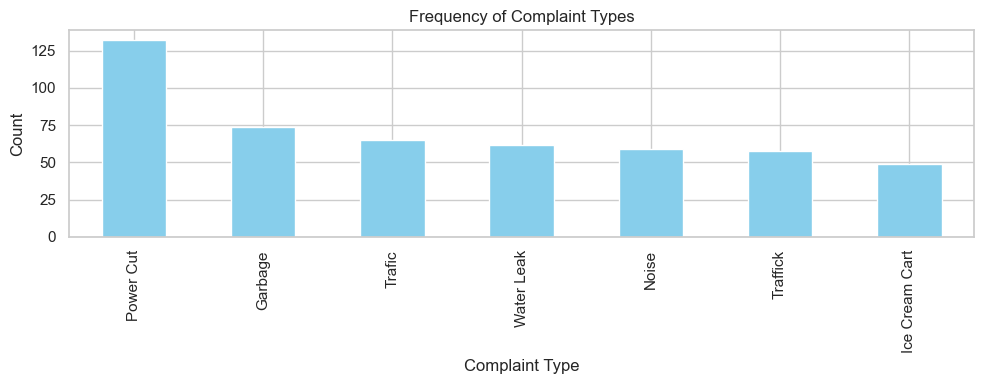

In [23]:
# Bar Chart: Complaint Types (fixed typos)
df['complaint_type_clean'] = df['complaint_type'].replace({
    'Trafic': 'Traffic',
    'Traffick': 'Traffic'
})
plt.figure(figsize=(10, 4))
df['complaint_type_clean'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Frequency of Complaint Types")
plt.xlabel("Complaint Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 4))
df['complaint_type'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Frequency of Complaint Types")
plt.xlabel("Complaint Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


# Text Data Visualization // Vectorizer

In [36]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud

In [38]:
newsgroups = fetch_20newsgroups(subset='train',categories=['sci.space'])


In [54]:
texts=newsgroups.data[:]

In [55]:
texts

["From: henry@zoo.toronto.edu (Henry Spencer)\nSubject: Re: japanese moon landing?\nOrganization: U of Toronto Zoology\nLines: 21\n\nIn article <1qnb9tINN7ff@rave.larc.nasa.gov> C.O.EGALON@LARC.NASA.GOV (CLAUDIO OLIVEIRA EGALON) writes:\n>> there is no such thing as a stable lunar orbit\n>\n>Is it right??? That is new stuff for me. So it means that  you just can \n>not put a sattellite around around the Moon for too long because its \n>orbit will be unstable??? If so, what is the reason??? Is that because \n>the combined gravitacional atraction of the Sun,Moon and Earth \n>that does not provide a stable  orbit around the Moon???\n\nAny lunar satellite needs fuel to do regular orbit corrections, and when\nits fuel runs out it will crash within months.  The orbits of the Apollo\nmotherships changed noticeably during lunar missions lasting only a few\ndays.  It is *possible* that there are stable orbits here and there --\nthe Moon's gravitational field is poorly mapped -- but we know of n

In [43]:
vectorizer=CountVectorizer(stop_words='english',max_features=1000)
x=vectorizer.fit_transform(texts)

In [44]:
x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 35682 stored elements and shape (593, 1000)>

In [45]:
print(x)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 35682 stored elements and shape (593, 1000)>
  Coords	Values
  (0, 404)	5
  (0, 998)	2
  (0, 906)	4
  (0, 286)	2
  (0, 834)	2
  (0, 860)	1
  (0, 459)	1
  (0, 585)	7
  (0, 491)	1
  (0, 636)	1
  (0, 999)	2
  (0, 514)	1
  (0, 26)	1
  (0, 112)	1
  (0, 492)	2
  (0, 591)	2
  (0, 382)	2
  (0, 290)	2
  (0, 991)	1
  (0, 890)	1
  (0, 532)	3
  (0, 629)	4
  (0, 754)	1
  (0, 600)	1
  (0, 859)	1
  :	:
  (592, 562)	1
  (592, 788)	1
  (592, 526)	1
  (592, 571)	1
  (592, 534)	2
  (592, 672)	1
  (592, 487)	1
  (592, 592)	1
  (592, 619)	2
  (592, 438)	2
  (592, 326)	1
  (592, 28)	1
  (592, 73)	1
  (592, 520)	2
  (592, 790)	1
  (592, 218)	3
  (592, 659)	1
  (592, 79)	1
  (592, 452)	1
  (592, 350)	1
  (592, 732)	1
  (592, 808)	1
  (592, 817)	1
  (592, 113)	1
  (592, 744)	1


In [49]:
word_freq=dict(zip(vectorizer.get_feature_names_out(),x.toarray().sum(axis=0)))

In [50]:
word_freq

{'00': np.int64(42),
 '000': np.int64(116),
 '01': np.int64(29),
 '02': np.int64(23),
 '04': np.int64(54),
 '10': np.int64(167),
 '100': np.int64(62),
 '11': np.int64(67),
 '12': np.int64(88),
 '13': np.int64(69),
 '14': np.int64(112),
 '15': np.int64(142),
 '16': np.int64(70),
 '17': np.int64(39),
 '18': np.int64(67),
 '19': np.int64(82),
 '1970': np.int64(23),
 '1988': np.int64(21),
 '1990': np.int64(30),
 '1992': np.int64(37),
 '1993': np.int64(163),
 '1993apr20': np.int64(38),
 '1993apr21': np.int64(29),
 '20': np.int64(128),
 '200': np.int64(30),
 '202': np.int64(32),
 '21': np.int64(59),
 '22': np.int64(75),
 '23': np.int64(77),
 '24': np.int64(46),
 '25': np.int64(65),
 '26': np.int64(35),
 '27': np.int64(29),
 '28': np.int64(39),
 '29': np.int64(25),
 '30': np.int64(103),
 '300': np.int64(40),
 '31': np.int64(34),
 '32': np.int64(31),
 '34': np.int64(27),
 '35': np.int64(24),
 '3539': np.int64(28),
 '39': np.int64(23),
 '40': np.int64(40),
 '41': np.int64(43),
 '43': np.int64(2

Text(0.5, 1.0, 'top words Sci.space articles')

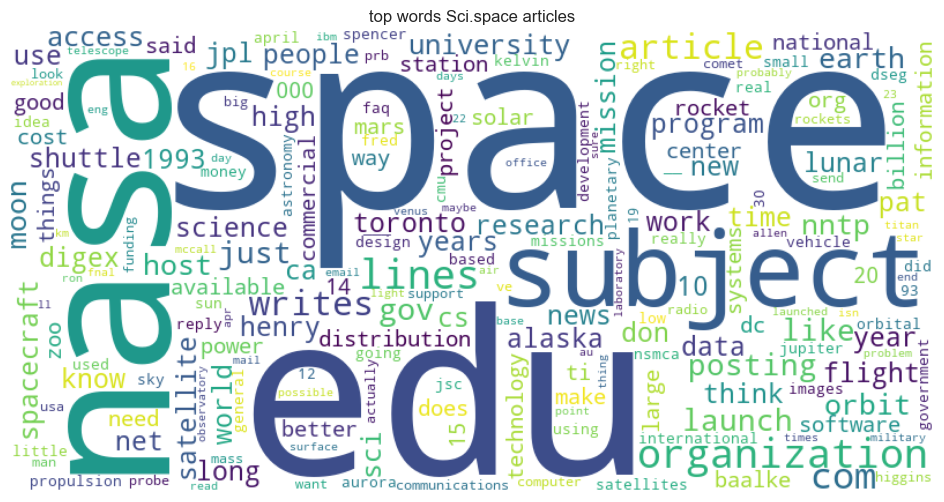

In [51]:
wordcloud= WordCloud(width =800, height=400, background_color='white').generate_from_frequencies(word_freq)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud,interpolation='hamming')
plt.axis('off')
plt.title('top words Sci.space articles')